In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_path = 'utc_xchange_v1.1/data/case2/'


In [3]:
pth = os.path.join(data_path,'case2_2022_price_paths.csv')
price_paths = pd.read_csv(pth)

In [4]:
prices = (np.array(price_paths)[:, 1:].T)

In [5]:
returns = np.copy(prices)
for i in range(returns.shape[1]-1):
    returns[:, i] = np.divide(returns[:,i+1]-returns[:,i], returns[:,i]/100)
returns = returns[:, :-1]

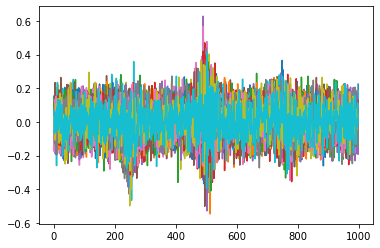

In [7]:
for i in range(30):
    plt.plot(returns[i], '-')

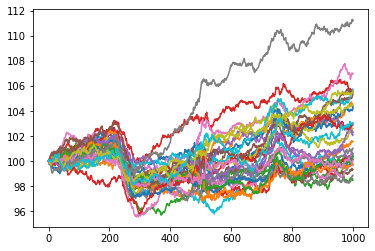

In [39]:
for i in range(30):
    plt.plot(prices[i])

In [37]:
np.mean(np.std(returns[:,-100:], axis=1))

0.07957248820786059

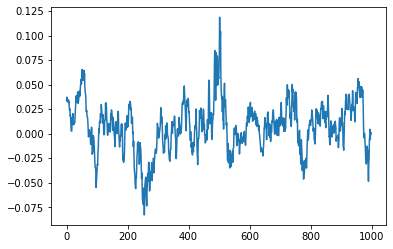

In [83]:
for i in range(30):
    ema = pd.DataFrame(returns[i]).ewm(span=21,adjust=False).mean()
    
plt.plot(ema)

/Users/bguo/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/Users/bguo/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


502.5882352941176
509.4117647058824


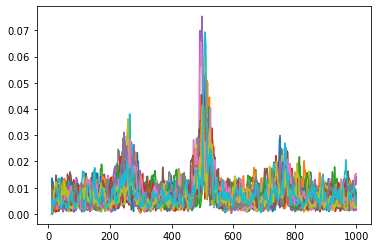

In [30]:
ms = []
Ms = []
for i in range(30):
    ret = list(returns[i])
    vols = []
    for x in range(1000):
        vol = np.var(ret[max(10, x-10):x])
        vols.append(vol)
    plt.plot(vols)
    m = np.min(np.where(np.array(vols) > 0.04), initial = 10000)
    if m != 10000:
        ms.append(m)
    m = np.max(np.where(np.array(vols) > 0.04), initial = -1)
    if m != -1:
        Ms.append(m)
print(np.mean(ms))
print(np.mean(Ms))

# 485 - 515  high volatility period

In [21]:
np.min(np.where(np.array(vols) > 0.04))

/Users/bguo/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


503

In [ ]:
for i in range(30):
    plt.plot(prices[i], '-')

In [54]:
features = np.zeros((30,4))
from sklearn import preprocessing

for stock in range(30):
    p = prices[stock]
    ret = list(returns[stock])
    v = np.std(ret[:200])
    features[stock, :] = np.array([p[100]-100, p[200]-p[100], p[300]-p[200], v])
    
scaler = preprocessing.StandardScaler().fit(features)
features = scaler.transform(features)

In [55]:
Y = prices[:, -1]

In [63]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = sm.add_constant(features)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     2.986
Date:                Tue, 05 Apr 2022   Prob (F-statistic):             0.0382
Time:                        18:17:03   Log-Likelihood:                -68.343
No. Observations:                  30   AIC:                             146.7
Df Residuals:                      25   BIC:                             153.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.5245      0.472    217.105      0.000     101.552     103.497
x1             0.3699      0.514      0.719      0.479      -0.689       1.429
x2             1.0933      0.513      2.131      0.043       0.037       2.150
x3             1.7231      0.533      3.232      0.003       0.625       2.821
x4             0.3629      0.494      0.734      0.470      -0.655       1.380
==============================================================================
Omnibus:                        2.070   Durbin-Watson:                   2.667
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.360
Skew:                           0.521   Prob(JB):                        0.507
Kurtosis:                       3.044   Cond. No.                         1.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# linear model forward

# use p[200]-p[100] and p[300]-p[200] given price up till 300

p = prices[15]
x1, x2 = p[200]-p[100], p[300] - p[200]

x1 = (x1 - scaler.mean_[1])/scaler.scale_[1]
x2 = (x2 - scaler.mean_[2])/scaler.scale_[2]

pred = 102.52 + 1.0933 * x1 + 0.533 * x2

In [77]:
pred

101.10792004417047

In [78]:
p[-1]

99.34255702712832